<h1 align="center"> Python Essentials: Data Visualization.</h1>

    <Name> Natalie Larsen
    <Class> 001
    <Date> 12-4-18

In [201]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, special

In [202]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

First
mean of x: 9.0 variance of x: 10.0
mean of y: 7.500909090909093 variance of y: 3.7520628099173554
slope: 0.5000909090909091 intercept: 3.0000909090909103 correlation coefficient: 0.8164205163448399
Second
mean of x: 9.0 variance of x: 10.0
mean of y: 7.50090909090909 variance of y: 3.752390082644628
slope: 0.5 intercept: 3.00090909090909 correlation coefficient: 0.8162365060002428
Third
mean of x: 9.0 variance of x: 10.0
mean of y: 7.5 variance of y: 3.747836363636364
slope: 0.4997272727272727 intercept: 3.0024545454545457 correlation coefficient: 0.8162867394895982
Fourth
mean of x: 9.0 variance of x: 10.0
mean of y: 7.500909090909091 variance of y: 3.7484082644628103
slope: 0.4999090909090909 intercept: 3.0017272727272726 correlation coefficient: 0.8165214368885028


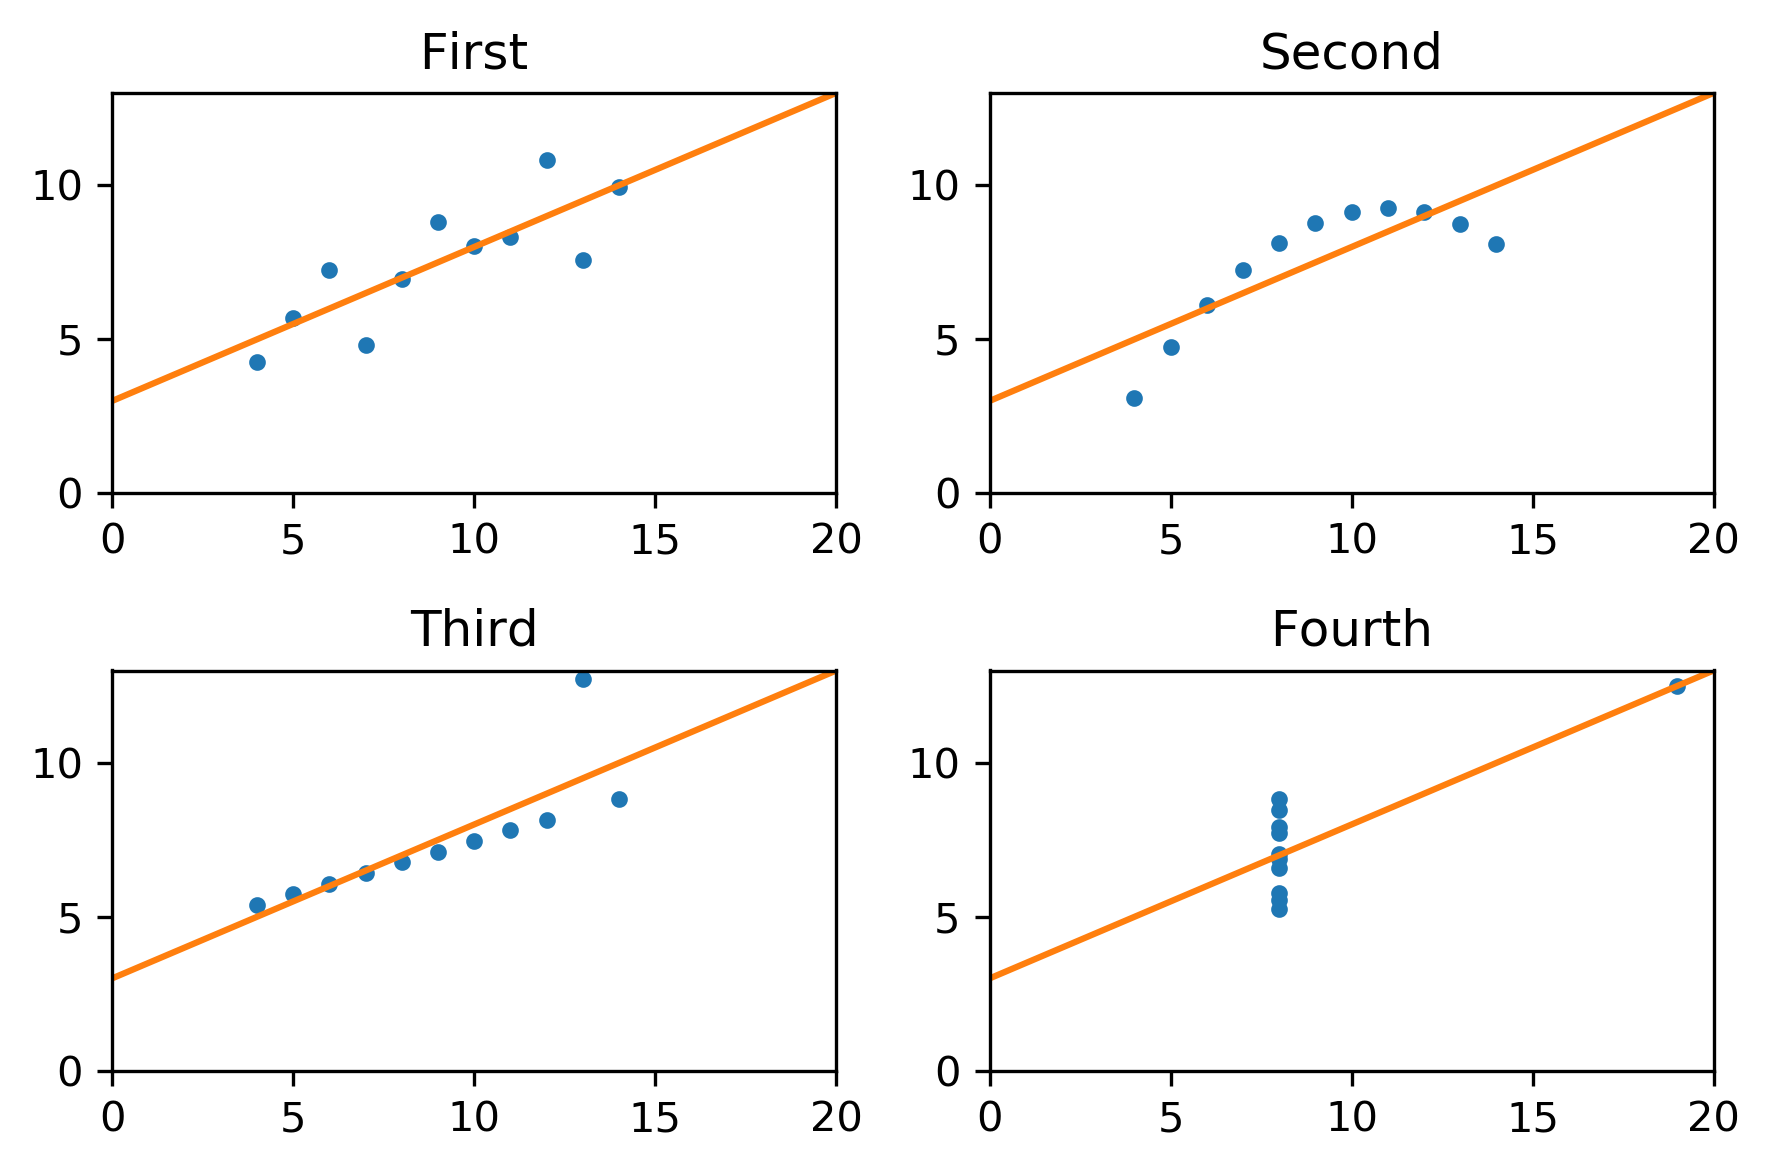

When looking at the stastics returned by linear regression, the sets of data appear to be exactly the same. When looking at the plotted points in the graphs, they are very different. For the first, they generally follow the line. The second one looks more lik a parabola. The third and fourth one have an outlier that skews the data to give it the same linear regression line, even though they generally follow a different trend.


In [203]:
A = np.load("anscombe.npy")
#separate the data
firstx = A[:,0]
firsty = A[:,1]
secx = A[:,2]
secy = A[:,3]
thirdx = A[:,4]
thirdy = A[:,5]
fourthx = A[:,6]
fourthy = A[:,7]

x = np.linspace(0,20,50)

#plot the first set of points
first = plt.subplot(221)
first.plot(firstx, firsty, ".")
first.axis([0,20,0,13])
first.set_title("First")
#find linear regression for first set
fs,fi,fc,fp,fstd = stats.linregress(firstx, firsty)
first.plot(x,x*fs+fi)
#print results
print("First\nmean of x:", np.mean(firstx), "variance of x:", np.var(firstx))
print("mean of y:", np.mean(firsty), "variance of y:", np.var(firsty))
print("slope:", fs, "intercept:", fi, "correlation coefficient:", fc)

#plot the second set of points
second = plt.subplot(222)
second.plot(secx,secy, ".")
second.axis([0,20,0,13])
second.set_title("Second")
#find linear regression for second set
ss,si,sc,sp,sstd = stats.linregress(secx, secy)
second.plot(x,x*ss+si)
#print results
print("Second\nmean of x:", np.mean(secx), "variance of x:", np.var(secx))
print("mean of y:", np.mean(secy), "variance of y:", np.var(secy))
print("slope:", ss, "intercept:", si, "correlation coefficient:", sc)

#plot the third set of points
third = plt.subplot(223)
third.plot(thirdx, thirdy, ".")
third.axis([0,20,0,13])
third.set_title("Third")
#find linear regression for third set
ts,ti,tc,tp,tstd = stats.linregress(thirdx, thirdy)
third.plot(x,x*ts+ti)
#print results
print("Third\nmean of x:", np.mean(thirdx), "variance of x:", np.var(thirdx))
print("mean of y:", np.mean(thirdy), "variance of y:", np.var(thirdy))
print("slope:", ts, "intercept:", ti, "correlation coefficient:", tc)

#plot the fourth set of points
fourth = plt.subplot(224)
fourth.plot(fourthx, fourthy, ".")
fourth.axis([0,20,0,13])
fourth.set_title("Fourth")
#find linear regression for fourth set
fos,foi,foc,fop,fostd = stats.linregress(fourthx, fourthy)
fourth.plot(x,x*fos+foi)
#print results
print("Fourth\nmean of x:", np.mean(fourthx), "variance of x:", np.var(fourthx))
print("mean of y:", np.mean(fourthy), "variance of y:", np.var(fourthy))
print("slope:", fos, "intercept:", foi, "correlation coefficient:", foc)

plt.tight_layout()
plt.show()

print("When looking at the stastics returned by linear regression, the sets of data appear to be exactly the same. When looking at the plotted points in the graphs, they are very different. For the first, they generally follow the line. The second one looks more lik a parabola. The third and fourth one have an outlier that skews the data to give it the same linear regression line, even though they generally follow a different trend.")

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

In [204]:
def bernstein(n,v,Y):
    #helper function to determine the bernstein polynomial
    return [special.binom(n,v)*(y**v)*(1-y)**(n-v) for y in Y]

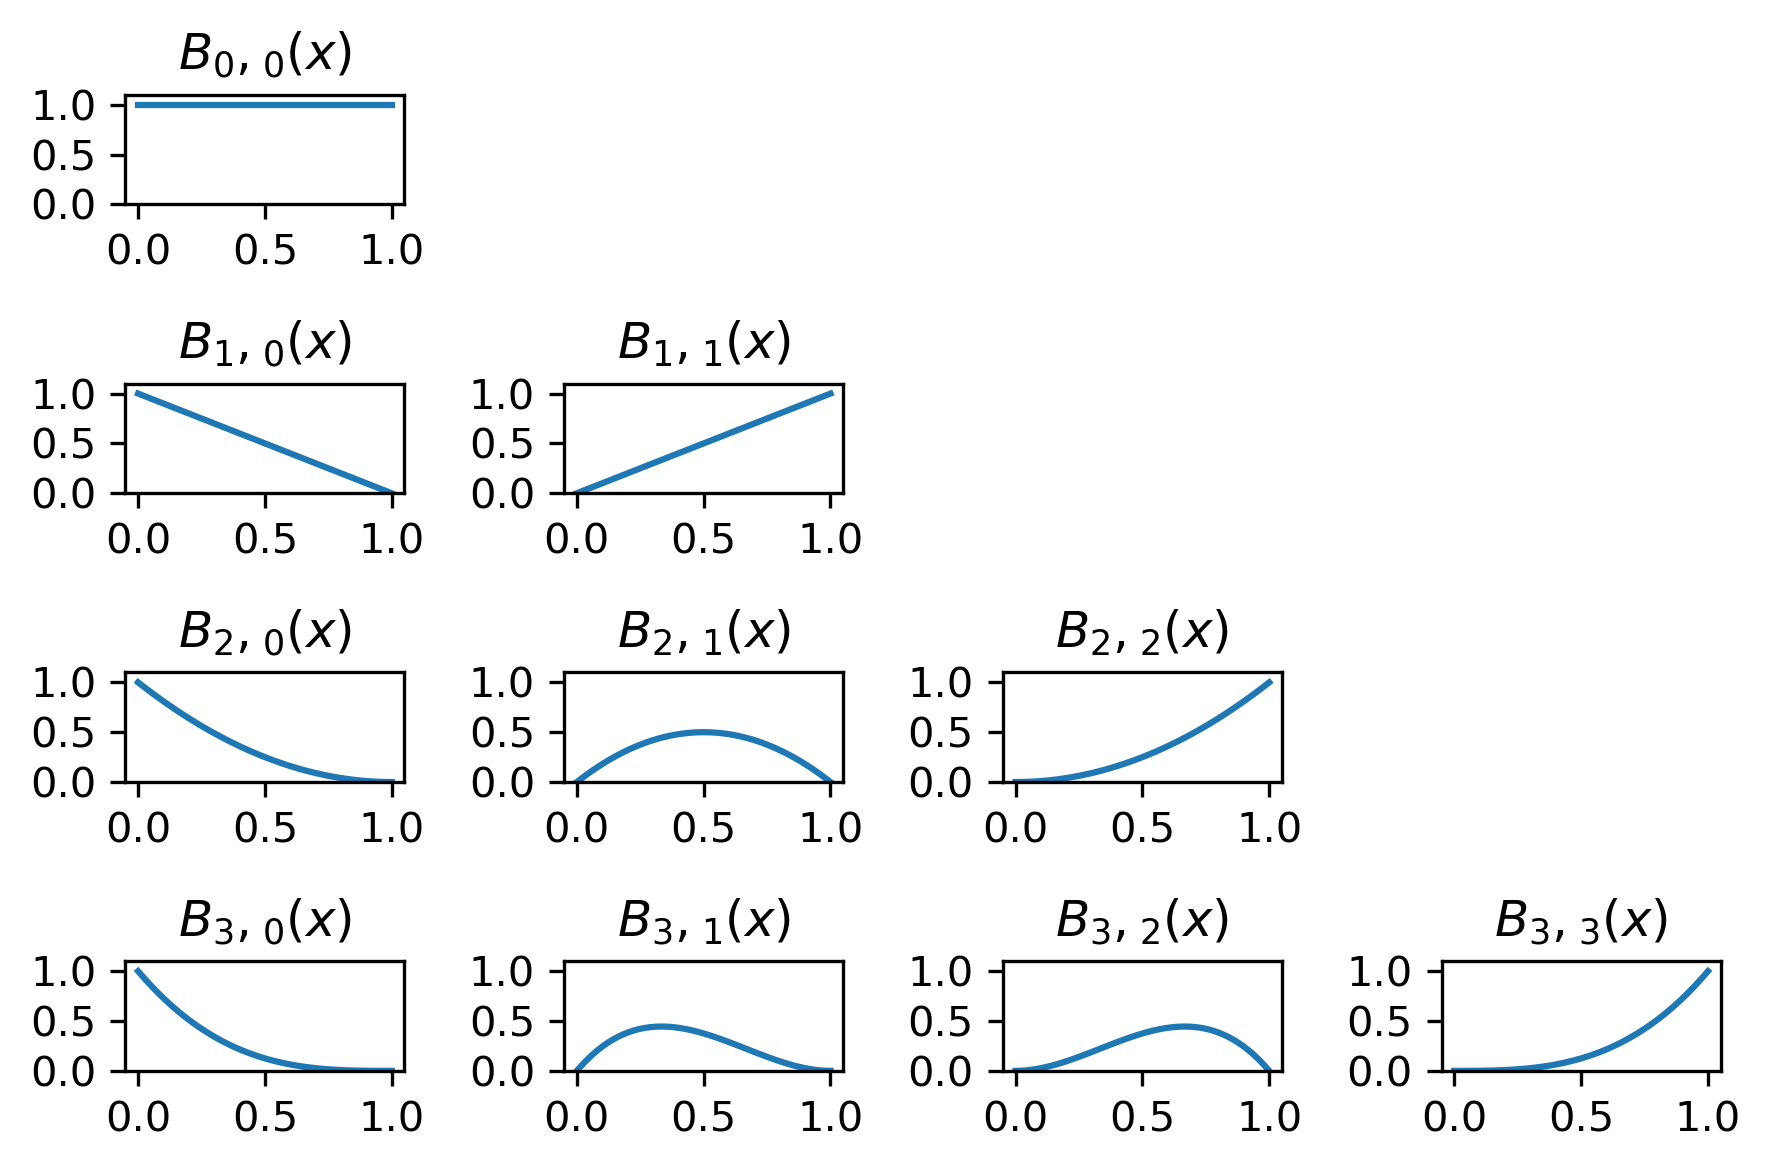

In [205]:
x = np.linspace(0,1,50)
col, row = 0, 0
t = np.linspace(0,1,3)
#for each subplot of figure
for i in range(1,17):
    #place plots in n,v location
    if col >= row:
        #plot bernstein polynomial
        bern = plt.subplot(4,4,i)
        bern.plot(x, bernstein(col,row,x))
        bern.set_title(r"$B_{},_{}(x)$".format(col,row))
        bern.set_ylim([0,1.1])
        #bern.set_xlabel('x', fontsize=5)
        #bern.set_ylabel('y', fontsize=5)
        bern.set_yticks(t)
        bern.set_xticks(t)
    row += 1
    #keep track of location
    if row > 3:
        col += 1
        row = 0
plt.tight_layout()
plt.show()


### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

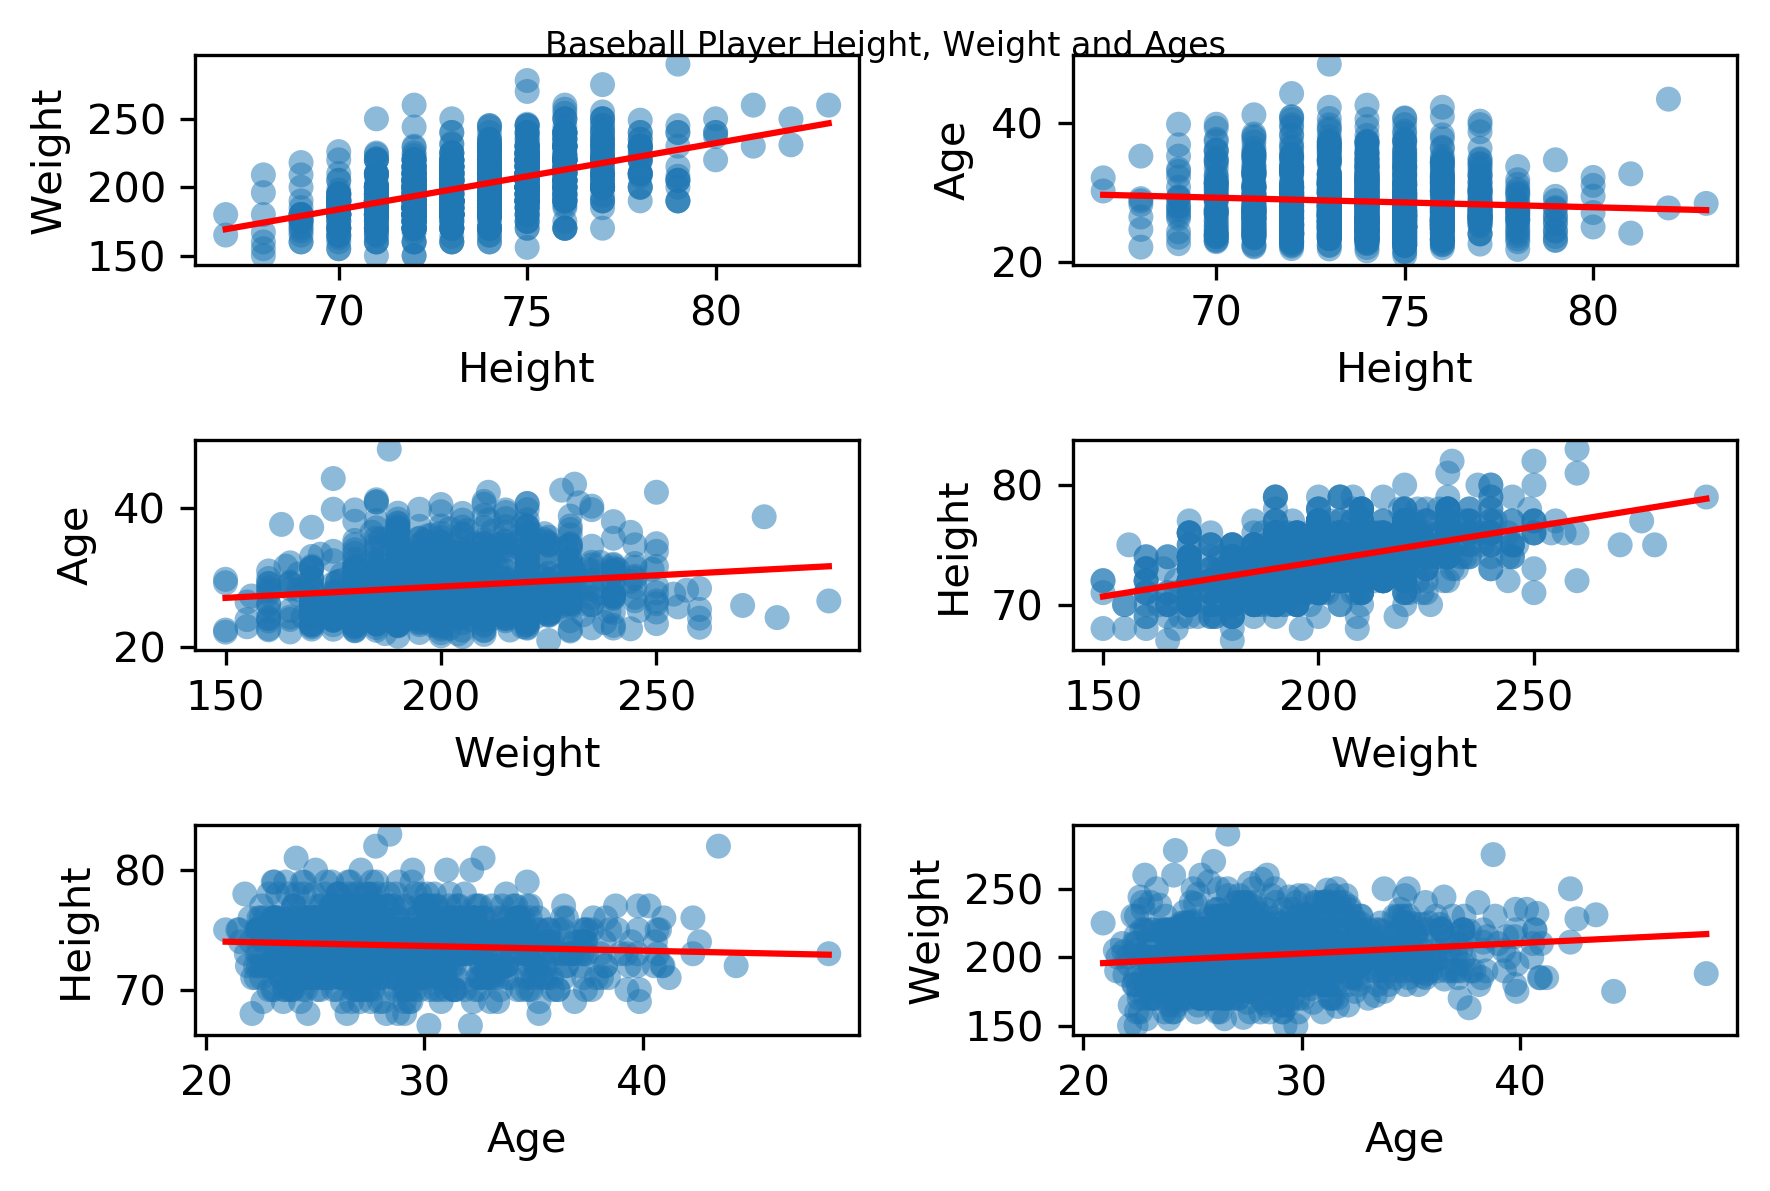

In [206]:
height, weight, age = np.load("MLB.npy").T
categories = [height, weight, age]
#keep track of index and what it is
indexes = dict({0:'Height',1:'Weight',2:'Age'})
i = 1
#for each possible measurement
for c in range(0,3):
    #paired with other measurement
    for r in range(1,3):
        #plot their relation to each other
        plot = plt.subplot(3,2,i)
        plot.scatter(categories[c],categories[(c+r)%3], alpha = .5, edgecolor="none")
        plot.set_xlabel(indexes[c])
        plot.set_ylabel(indexes[(c+r)%3])
        #plot.set_title(indexes[c] + " by " + indexes[(c+r)%3], fontsize=7)
        #plot linear regression line
        s,inter,q,w,e = stats.linregress(categories[c],categories[(c+r)%3])
        x = np.linspace(np.max(categories[c]),np.min(categories[c]),50)
        plot.plot(x,s*x+inter,'r')
        i +=1
plt.suptitle("Baseball Player Height, Weight and Ages", fontsize=8)
plt.tight_layout()
plt.show()


### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

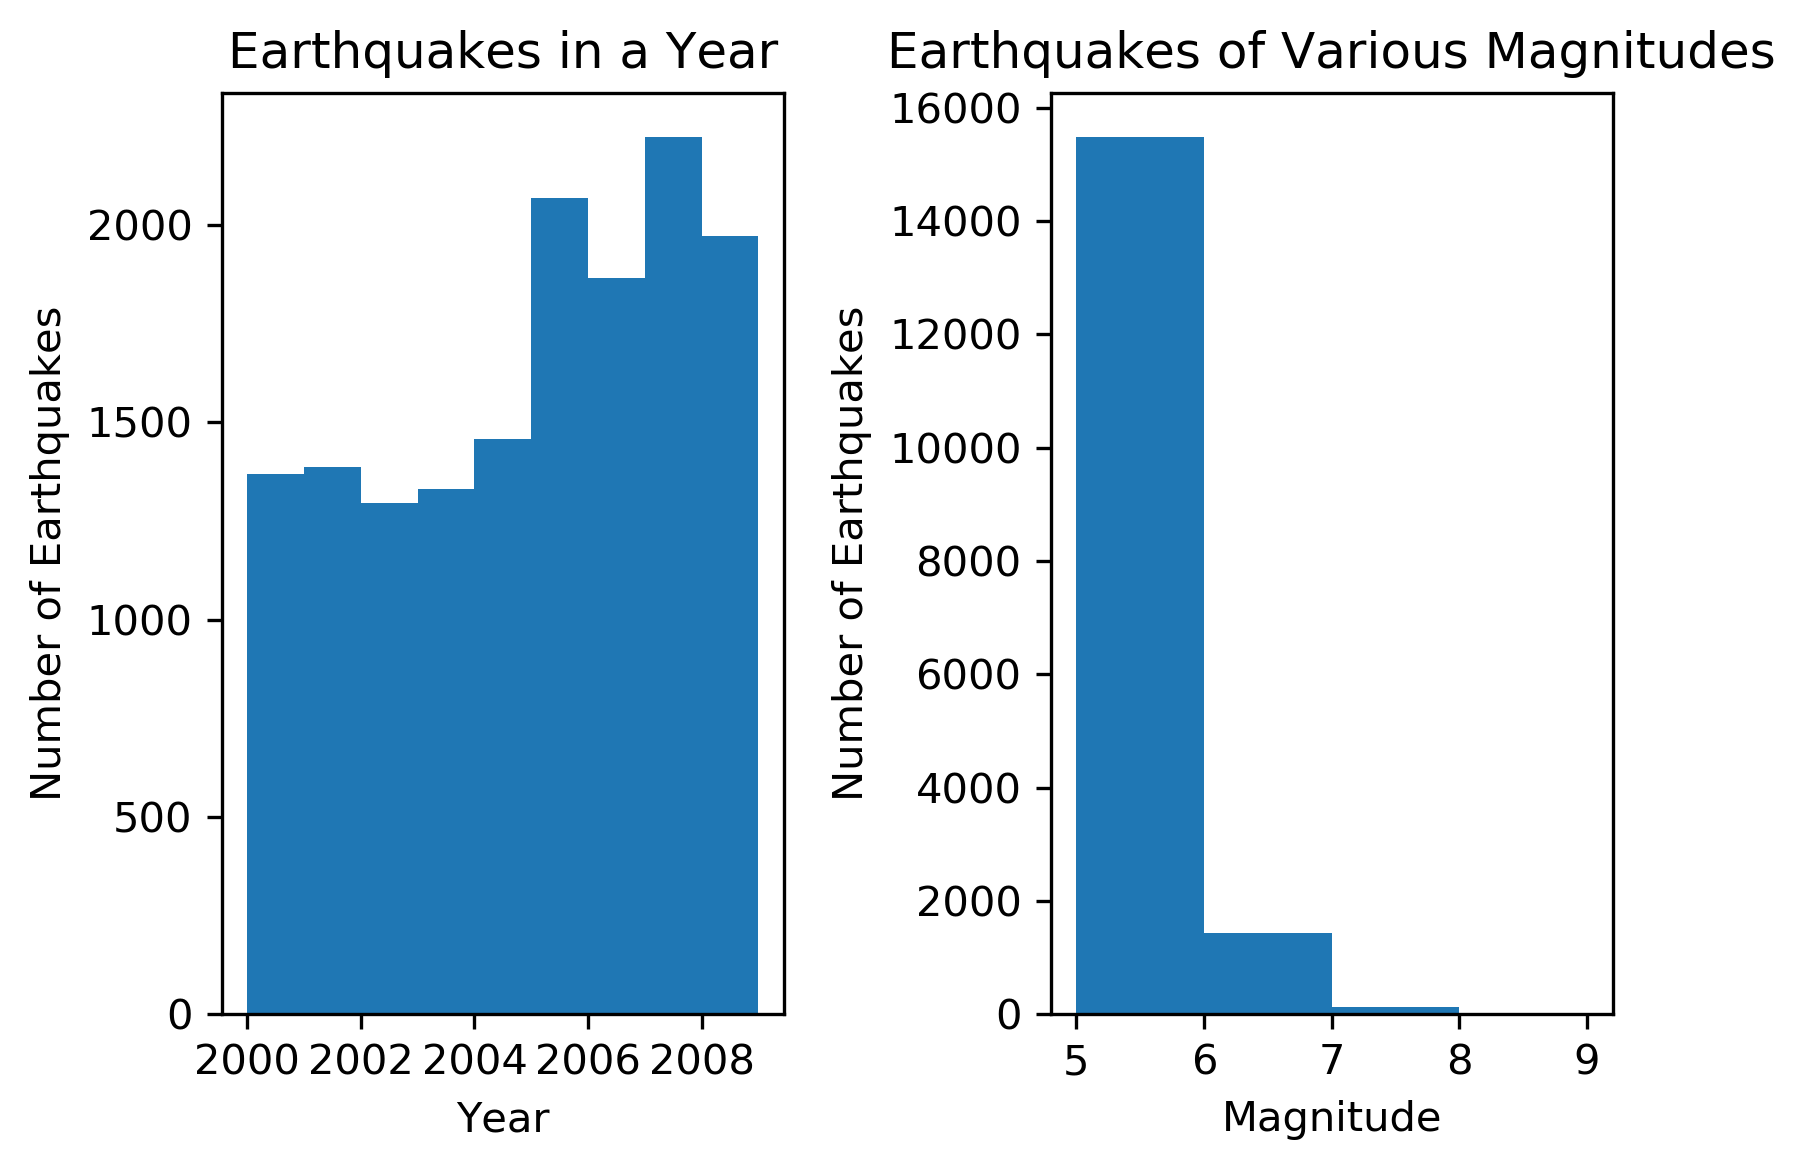

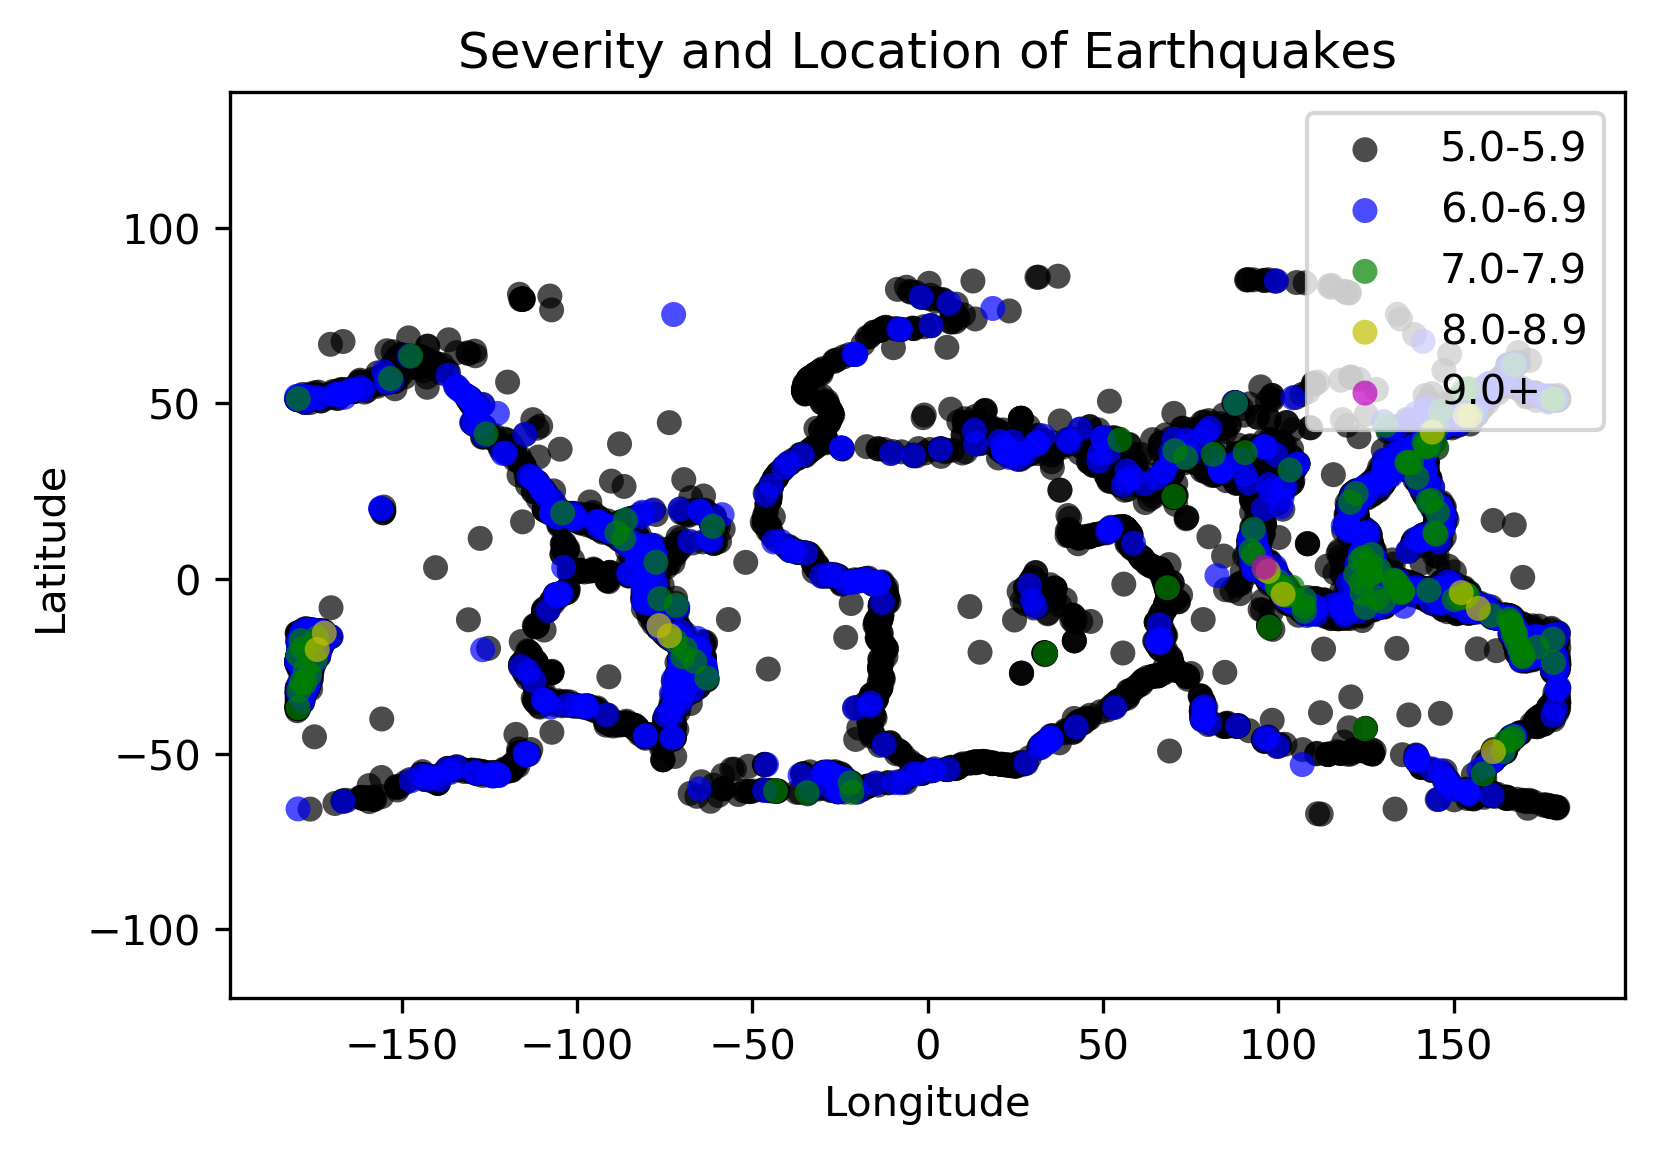

In [207]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T
fig,ax = plt.subplots(1,2)
bins = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]
#plot histogram of the year that earthquakes occured
ax[0].hist(years, bins=bins)
ax[0].set_xticks(bins[::2])
ax[0].set_title('Earthquakes in a Year')
ax[0].set_ylabel('Number of Earthquakes')
ax[0].set_xlabel('Year')


#plot hist of magnitudes
mags = np.arange(5,10)
ax[1].hist(magnitudes, bins=mags)
ax[1].set_title("Earthquakes of Various Magnitudes")
ax[1].set_ylabel('Number of Earthquakes')
ax[1].set_xlabel('Magnitude')
ax[1].set_xticks(mags)

plt.tight_layout()
plt.show()

#organize the longitude/latitude data by magnitude
long5 = []
lat5 = []
long6 = []
lat6 = []
long7 = []
lat7 = []
long8 = []
lat8 = []
long9 = []
lat9 = []
for i in range(0,len(magnitudes)):
    if 5<= magnitudes[i] < 6:
        long5.append(longitude[i])
        lat5.append(latitude[i])
    elif 6<= magnitudes[i] < 7:
        long6.append(longitude[i])
        lat6.append(latitude[i])
    elif 7<= magnitudes[i] < 8:
        long7.append(longitude[i])
        lat7.append(latitude[i])
    elif 8<= magnitudes[i] < 9:
        long8.append(longitude[i])
        lat8.append(latitude[i])
    elif 9<= magnitudes[i] < 10:
        long9.append(longitude[i])
        lat9.append(latitude[i])
#plot each magnitude range a different color in a scatter plot
f = plt.scatter(long5,lat5,c="k",alpha=.7,edgecolor="none")
s = plt.scatter(long6,lat6,c="b",alpha=.7,edgecolor="none")
se = plt.scatter(long7,lat7,c="g",alpha=.7,edgecolor="none")
e = plt.scatter(long8,lat8,c="y",alpha=.7,edgecolor="none")
n = plt.scatter(long9,lat9,c="m",alpha=.7,edgecolor="none")
#add title and legend
plt.legend((f,s,se,e,n),('5.0-5.9','6.0-6.9','7.0-7.9','8.0-8.9','9.0+'),loc="upper right")
plt.title("Severity and Location of Earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis("equal")

plt.show()

### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

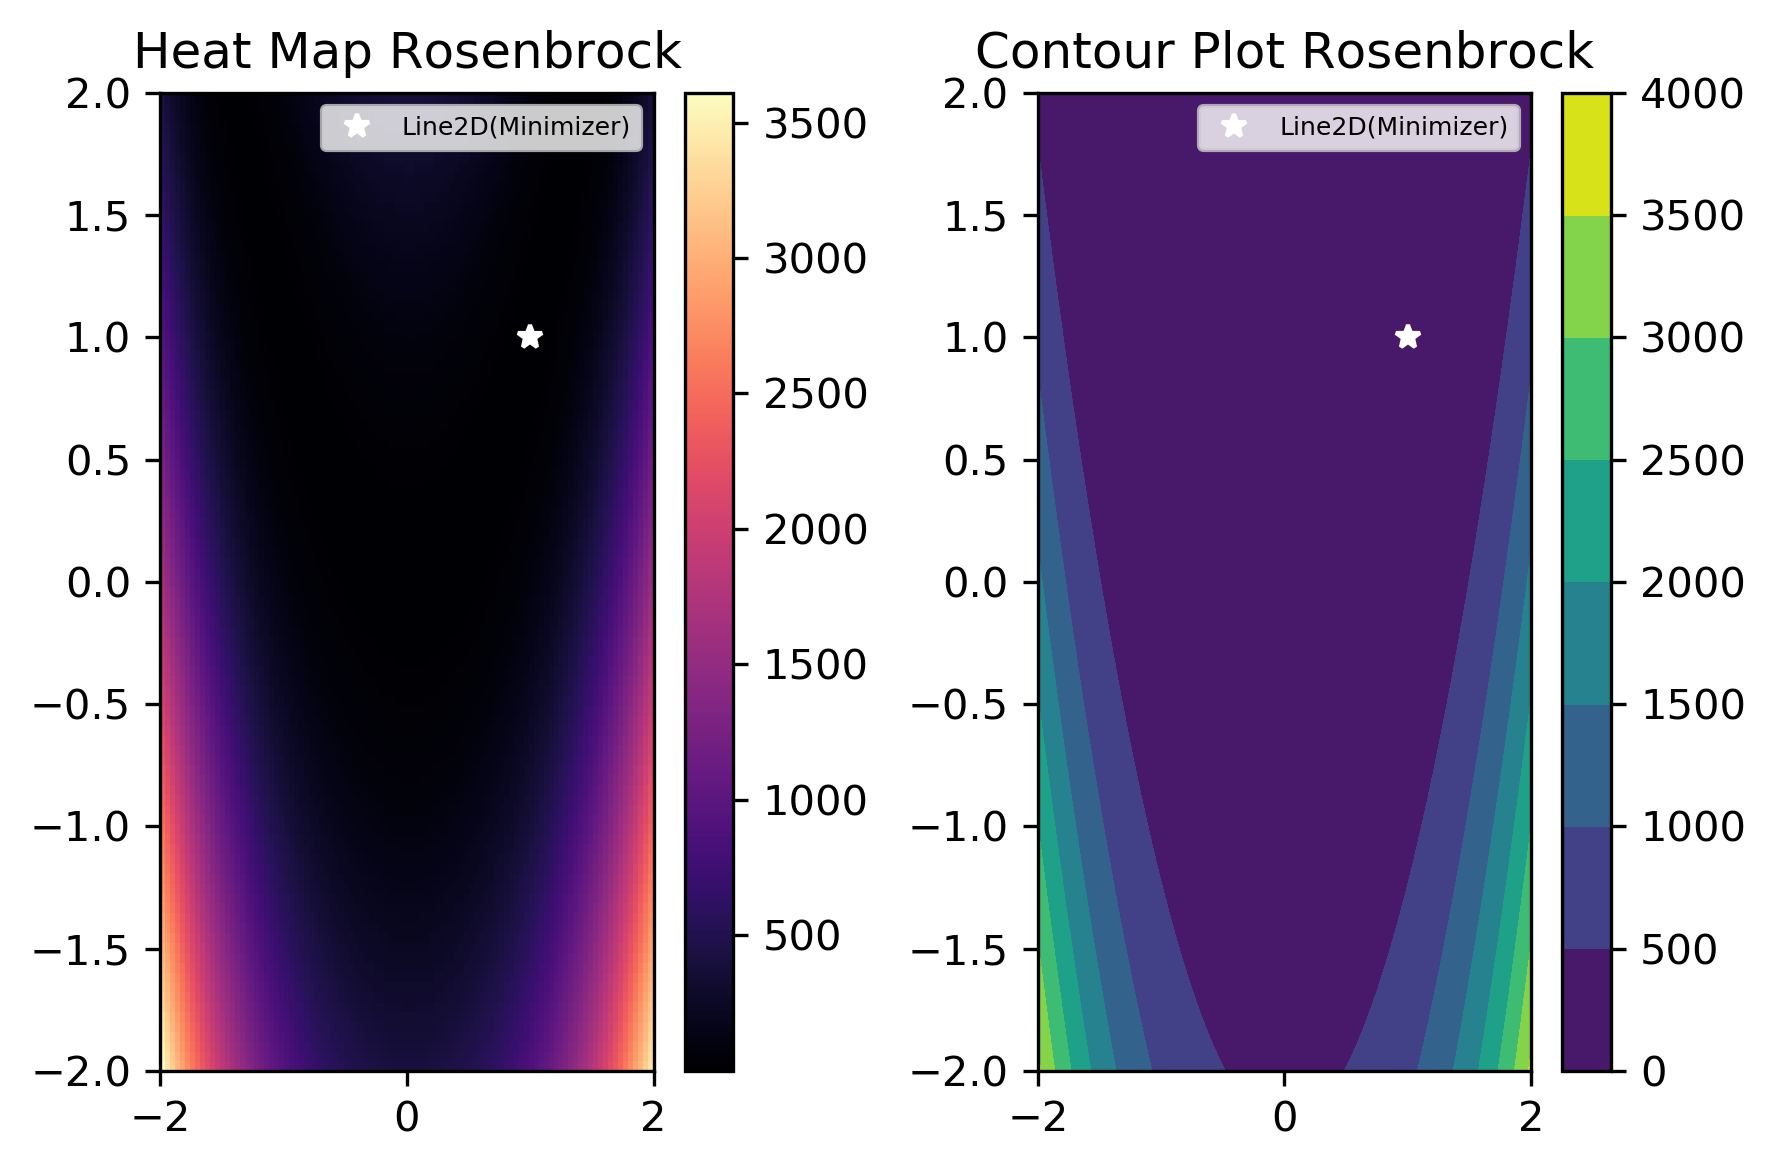

In [208]:
x = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,x)
Z = (1-X)**2 + 100 * (Y-X**2)**2
#plot heat map
heat = plt.subplot(121)
cont = plt.subplot(122)
hot = heat.pcolormesh(X,Y,Z,cmap='magma')
#minimizer
minih = heat.plot(1,1,"w*",label='Minimizer')
heat.legend(minih,loc="upper right", fontsize=6)
heat.set_title("Heat Map Rosenbrock")
plt.colorbar(hot,ax=heat)

#plot contour plot
contour = cont.contourf(X,Y,Z,cmap='viridis')
#minimizer
minic = cont.plot(1,1,"w*",label="Minimizer")
cont.legend(minic,loc="upper right", fontsize=6)
cont.set_title("Contour Plot Rosenbrock")
plt.colorbar(contour)
plt.tight_layout()
plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

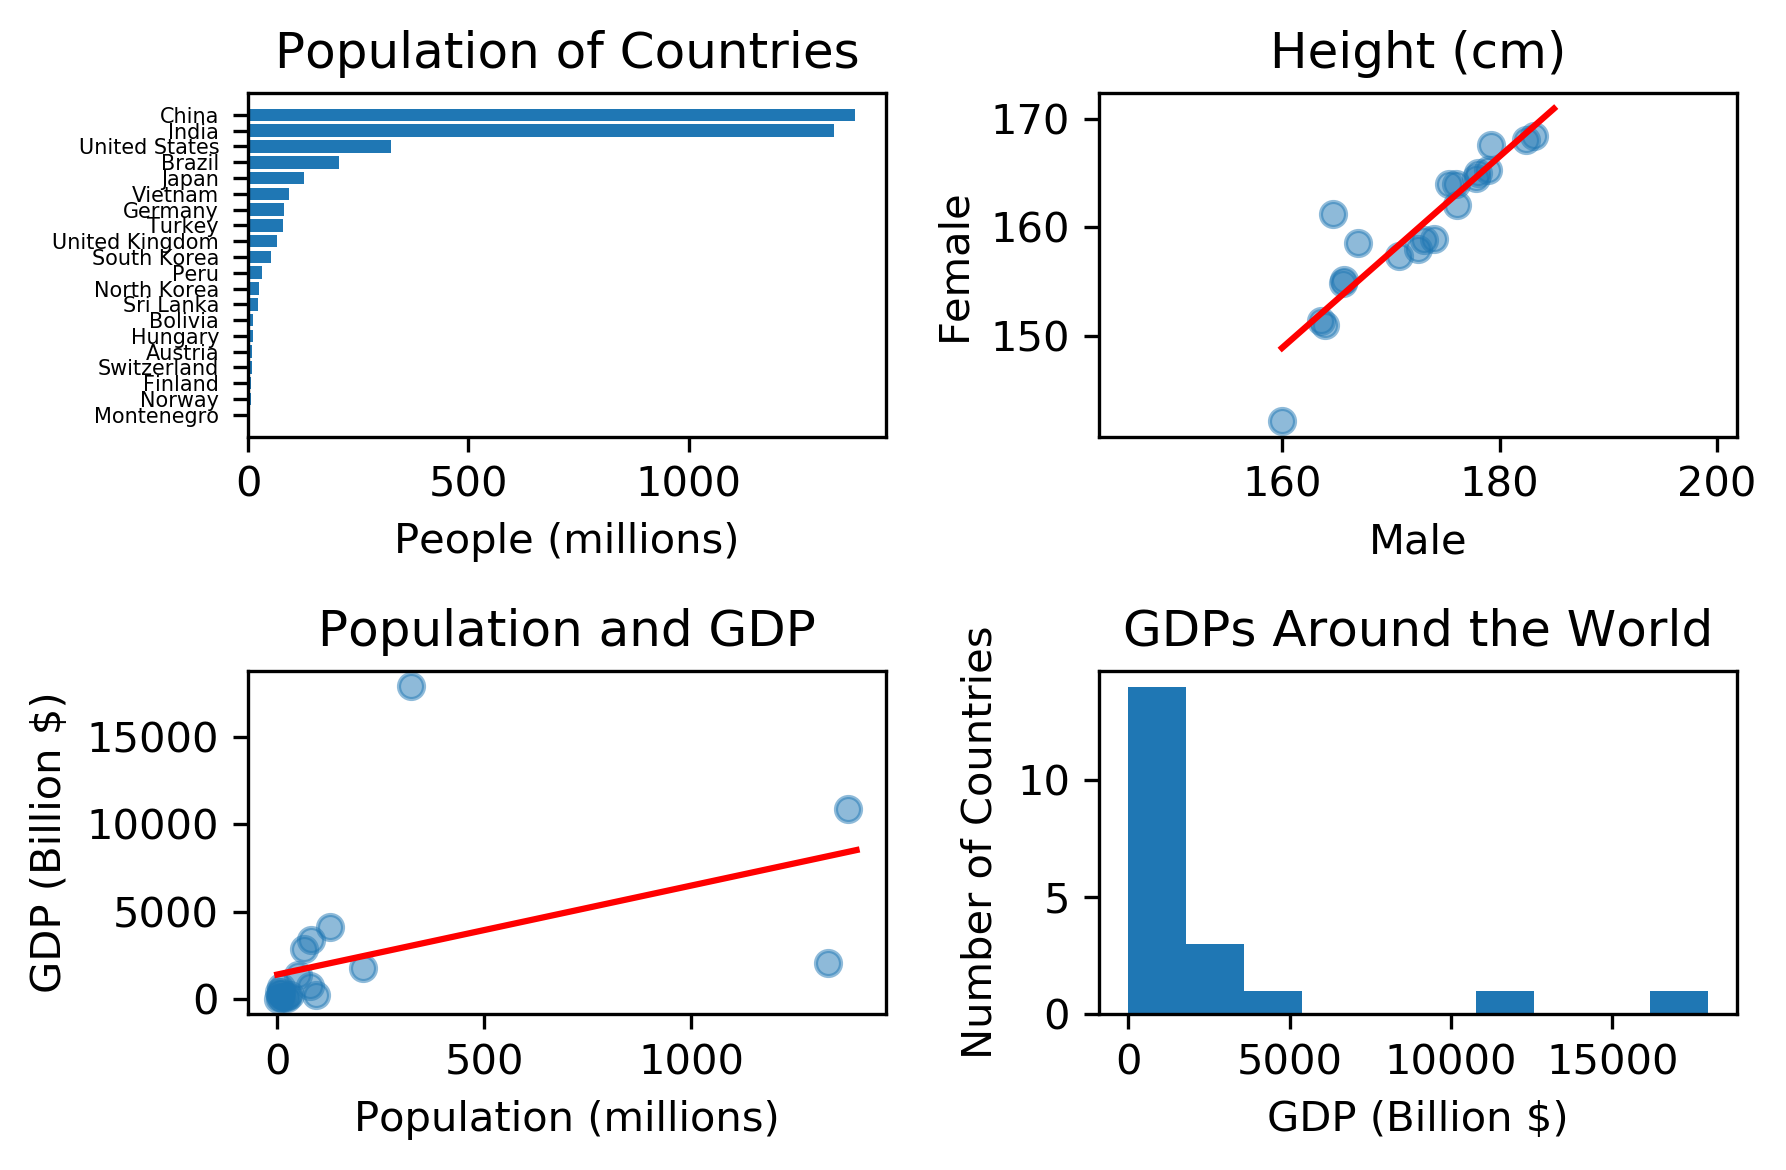

Insights:
The countries in Asia tend to have a lot more people than those in Europe. China and India have about 4 times as many as the next largest.
As the average height of males increases, the average height of women also increases
Normally the greater the population, the greater the GDP, but it has some extreme outliers.
Most countries have a GDP of less than $2,000 Billion.


In [209]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T
fig,ax = plt.subplots(2,2)

#Bar graph of population per country
yes = countries[np.argsort(population)]
pos = np.arange(len(countries))
ax[0,0].barh(pos,population[np.argsort(population)],align='center')
ax[0,0].set_yticks(pos)
ax[0,0].set_yticklabels(yes,fontsize=5)
ax[0,0].set_title("Population of Countries")
ax[0,0].set_xlabel("People (millions)")


#scatter plot comparing men and women heights
ax[0,1].scatter(male,female,alpha=.5)
#plot line of regression
x = np.linspace(160,185,50)
s,i,q,w,e = stats.linregress(male,female)
ax[0,1].plot(x,s*x+i,'r')
ax[0,1].set_title("Height (cm)")
ax[0,1].set_xlabel("Male")
ax[0,1].set_ylabel("Female")
ax[0,1].axis("equal")

#scatter plot comparing population and gdp
ax[1,0].scatter(population, gdp, alpha=.5)
#plot line of regression
x = np.linspace(0,1400,50)
s,i,q,w,e = stats.linregress(population,gdp)
ax[1,0].plot(x,s*x+i,'r')
ax[1,0].set_title('Population and GDP')
ax[1,0].set_xlabel('Population (millions)')
ax[1,0].set_ylabel('GDP (Billion $)')

#histograph of gdp
ax[1,1].hist(gdp)
ax[1,1].set_title('GDPs Around the World')
ax[1,1].set_xlabel('GDP (Billion $)')
ax[1,1].set_ylabel('Number of Countries')

#format the subplots prettily
plt.tight_layout()
plt.show()

#print out insights
print("Insights:","The countries in Asia tend to have a lot more people than those in Europe. China and India have about 4 times as many as the next largest.", 
      "As the average height of males increases, the average height of women also increases", "Normally the greater the population, the greater the GDP, but it has some extreme outliers.",
      "Most countries have a GDP of less than $2,000 Billion.", sep='\n')